# Neural Networks With TensorFlow
## Stable implementation

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import variance_scaling_initializer # He-initializer
import matplotlib.pyplot as plt
from jupyter_tf_graph import show_graph

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0

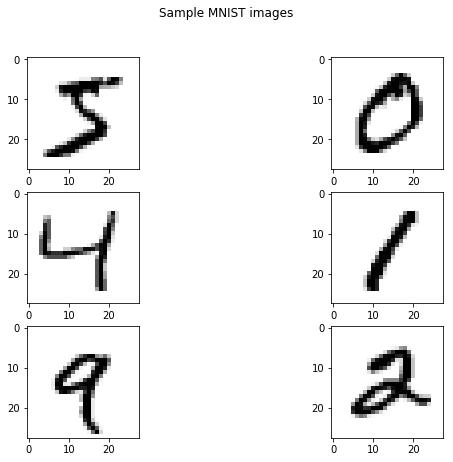

In [3]:
np.random.seed(1643)
img_ixs = np.random.randint(0, X_train.shape[0], 6)
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Sample MNIST images")
for ix, img_ixs in enumerate(img_ixs):
    ax = fig.add_subplot(3, 2, ix + 1)
    ax.imshow(X_train[ix].reshape(28, 28), cmap="gray_r")

## Training a Fully Connected Deep Neural Network
### FFNN V.01
Feed forward neural network with sigmoid activation function and Gradient Descent Optimizer

In [67]:
tf.reset_default_graph()

logs = "./tf_logs/ffnn_v01"

n_inputs = 28 * 28
n_hidden = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=None, name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden, activation=tf.nn.sigmoid, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden, activation=tf.nn.sigmoid, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden, activation=tf.nn.sigmoid, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden, activation=tf.nn.sigmoid, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden, activation=tf.nn.sigmoid, name="hidden5")
    outputs = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=outputs
    )
    loss = tf.reduce_mean(xentropy, name="loss")
    

alpha = 0.001
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(alpha)
    train_step = optimizer.minimize(loss)

with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(outputs, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    tb_train_writer = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    tb_cv_writer = tf.summary.FileWriter(logs + "/cv", tf.get_default_graph())
    tb_accuracy = tf.summary.scalar("Accuracy", accuracy)
    
init = tf.global_variables_initializer()

In [68]:
%%time
epochs = 400
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run(train_step, feed_dict={X: X_train, y: y_train})
        acc, tb_acc = sess.run([accuracy, tb_accuracy], feed_dict={X: X_train, y: y_train})
        cvacc, tb_cvacc = sess.run([accuracy, tb_accuracy], feed_dict={X: X_test, y: y_test})
        tb_train_writer.add_summary(tb_acc, epoch)
        tb_cv_writer.add_summary(tb_cvacc, epoch)
        
        end = "\n" if epoch % 40 == 0 else "\r"
        print(f"@Epoch {epoch: 03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)

@Epoch  00: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  40: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  80: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  120: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  160: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  200: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  240: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  280: Train Accuracy 011.24% | Test Accuracy 011.35%
@Epoch  320: Train Accuracy 011.24% | Test Accuracy 011.35%
@Epoch  360: Train Accuracy 011.24% | Test Accuracy 011.35%
CPU times: user 24min 36s, sys: 4min 15s, total: 28min 51s%
Wall time: 6min 50s


----
### FFNN V.02
Feed forward neural network with elu activation function and Gradient Descent Optimizer

In [69]:
tf.reset_default_graph()

logs = "./tf_logs/ffnn_v02"

n_inputs = 28 * 28
n_hidden = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=None, name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden, activation=tf.nn.elu, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden, activation=tf.nn.elu, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden, activation=tf.nn.elu, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden, activation=tf.nn.elu, name="hidden5")
    outputs = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=outputs
    )
    loss = tf.reduce_mean(xentropy, name="loss")
    

alpha = 0.001
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(alpha)
    train_step = optimizer.minimize(loss)

with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(outputs, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    tb_train_writer = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    tb_cv_writer = tf.summary.FileWriter(logs + "/cv", tf.get_default_graph())
    tb_accuracy = tf.summary.scalar("Accuracy", accuracy)
    
init = tf.global_variables_initializer()

In [70]:
%%time
epochs = 400
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run(train_step, feed_dict={X: X_train, y: y_train})
        acc, tb_acc = sess.run([accuracy, tb_accuracy], feed_dict={X: X_train, y: y_train})
        cvacc, tb_cvacc = sess.run([accuracy, tb_accuracy], feed_dict={X: X_test, y: y_test})
        tb_train_writer.add_summary(tb_acc, epoch)
        tb_cv_writer.add_summary(tb_cvacc, epoch)
        
        end = "\n" if epoch % 40 == 0 else "\r"
        print(f"@Epoch {epoch: 03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)

@Epoch  00: Train Accuracy 006.13% | Test Accuracy 006.11%
@Epoch  40: Train Accuracy 009.70% | Test Accuracy 009.56%
@Epoch  80: Train Accuracy 014.78% | Test Accuracy 014.49%
@Epoch  120: Train Accuracy 021.02% | Test Accuracy 021.13%
@Epoch  160: Train Accuracy 027.68% | Test Accuracy 028.32%
@Epoch  200: Train Accuracy 033.88% | Test Accuracy 034.71%
@Epoch  240: Train Accuracy 039.29% | Test Accuracy 040.41%
@Epoch  280: Train Accuracy 043.42% | Test Accuracy 044.78%
@Epoch  320: Train Accuracy 047.05% | Test Accuracy 048.85%
@Epoch  360: Train Accuracy 050.14% | Test Accuracy 051.77%
CPU times: user 26min 10s, sys: 4min 11s, total: 30min 22s%
Wall time: 6min 56s


----
### FFNN V.03
Feed forward neural network with elu activation function and ADAM Optimizer

In [71]:
tf.reset_default_graph()

logs = "./tf_logs/ffnn_v03"

n_inputs = 28 * 28
n_hidden = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=None, name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden, activation=tf.nn.elu, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden, activation=tf.nn.elu, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden, activation=tf.nn.elu, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden, activation=tf.nn.elu, name="hidden5")
    outputs = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=outputs
    )
    loss = tf.reduce_mean(xentropy, name="loss")
    

alpha = 0.001
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(alpha)
    train_step = optimizer.minimize(loss)

with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(outputs, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    tb_train_writer = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    tb_cv_writer = tf.summary.FileWriter(logs + "/cv", tf.get_default_graph())
    tb_accuracy = tf.summary.scalar("Accuracy", accuracy)
    
init = tf.global_variables_initializer()

In [72]:
%%time
epochs = 400
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run(train_step, feed_dict={X: X_train, y: y_train})
        acc, tb_acc = sess.run([accuracy, tb_accuracy],
                               feed_dict={X: X_train, y: y_train})
        cvacc, tb_cvacc = sess.run([accuracy, tb_accuracy],
                                   feed_dict={X: X_test, y: y_test})
        tb_train_writer.add_summary(tb_acc, epoch)
        tb_cv_writer.add_summary(tb_cvacc, epoch)
        
        end = "\n" if epoch % 40 == 0 else "\r"
        print(f"@Epoch {epoch: 03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)

@Epoch  00: Train Accuracy 025.93% | Test Accuracy 026.65%
@Epoch  40: Train Accuracy 091.63% | Test Accuracy 091.74%
@Epoch  80: Train Accuracy 094.57% | Test Accuracy 094.37%
@Epoch  120: Train Accuracy 096.32% | Test Accuracy 095.71%
@Epoch  160: Train Accuracy 097.35% | Test Accuracy 096.45%
@Epoch  200: Train Accuracy 098.10% | Test Accuracy 096.92%
@Epoch  240: Train Accuracy 098.75% | Test Accuracy 097.19%
@Epoch  280: Train Accuracy 098.96% | Test Accuracy 097.31%
@Epoch  320: Train Accuracy 099.46% | Test Accuracy 097.39%
@Epoch  360: Train Accuracy 099.69% | Test Accuracy 097.42%
CPU times: user 26min 11s, sys: 4min 17s, total: 30min 28s%
Wall time: 7min 14s


----
### FFNN V.04
Feed forward neural network with elu activation function, ADAM Optimizer and Batch Norm

In [88]:
tf.reset_default_graph()

logs = "./tf_logs/ffnn_v04/"

n_inputs = 28 * 28
n_hidden = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name="training")

eta = 0.9
with tf.name_scope("dnn"):
    z1 = tf.layers.dense(X, n_hidden, name="z1")
    z1_bn = tf.layers.batch_normalization(z1, training=training, momentum=eta)
    a1 = tf.nn.elu(z1_bn)
    
    z2 = tf.layers.dense(a1, n_hidden, name="z2")
    z2_bn = tf.layers.batch_normalization(z2, training=training, momentum=eta)
    a2 = tf.nn.elu(z2_bn)
    
    z3 = tf.layers.dense(a2, n_hidden, name="z3")
    z3_bn = tf.layers.batch_normalization(z3, training=training, momentum=eta)
    a3 = tf.nn.elu(z3_bn)
    
    z4 = tf.layers.dense(a3, n_hidden, name="z4")
    z4_bn = tf.layers.batch_normalization(z4, training=training, momentum=eta)
    a4 = tf.nn.elu(z4)
    
    z5 = tf.layers.dense(a4, n_hidden, name="z5")
    z5_bn = tf.layers.batch_normalization(z5, training=training, momentum=eta)
    a5 = tf.nn.elu(z5_bn)
    
    output = tf.layers.dense(a5, n_hidden, name="output")


with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=output
    )
    loss = tf.reduce_mean(xentropy, name="loss")

    
alpha = 0.001
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(alpha)
    train_step = optimizer.minimize(loss)

    
with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(output, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    tb_train_writer = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    tb_cv_writer = tf.summary.FileWriter(logs + "/cv", tf.get_default_graph())
    tb_accuracy = tf.summary.scalar("Accuracy", accuracy)

init = tf.global_variables_initializer()

In [89]:
%%time

# Operations to compute the mean and standard deviation of the minibatch
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
epochs = 400
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run([train_step, extra_update_ops], feed_dict={training: True, X: X_train, y: y_train})
        acc, tb_acc = sess.run([accuracy, tb_accuracy],
                               feed_dict={X: X_train, y: y_train})
        cvacc, tb_cvacc = sess.run([accuracy, tb_accuracy],
                                    feed_dict={X: X_test, y: y_test})
        
        tb_train_writer.add_summary(tb_acc, epoch)
        tb_cv_writer.add_summary(tb_cvacc, epoch)
        
        end = "\n" if epoch % 40 == 0 else "\r"
        print(f"@Epoch {epoch:03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)

@Epoch  00: Train Accuracy 005.91% | Test Accuracy 005.43%
@Epoch  40: Train Accuracy 091.78% | Test Accuracy 092.06%
@Epoch  80: Train Accuracy 095.16% | Test Accuracy 094.87%
@Epoch  120: Train Accuracy 096.90% | Test Accuracy 096.05%
@Epoch  160: Train Accuracy 097.95% | Test Accuracy 096.75%
@Epoch  200: Train Accuracy 098.79% | Test Accuracy 097.07%
@Epoch  240: Train Accuracy 099.32% | Test Accuracy 097.29%
@Epoch  280: Train Accuracy 099.68% | Test Accuracy 097.37%
@Epoch  320: Train Accuracy 099.87% | Test Accuracy 097.45%
@Epoch  360: Train Accuracy 099.95% | Test Accuracy 097.43%
CPU times: user 47min 35s, sys: 6min 25s, total: 54min7.43%
Wall time: 10min 52s


## Feed Forward Neural Network Version Comparison
![FFNNs Comparisson](./images/ffnn_vs.png)

----
----
# Storing and Reusing TF Models

In [4]:
from functools import partial

def a_plus_b(a, b): return a + b
a_plus_3 = partial(a_plus_b, b=3)
a_plus_3(5)

8

## 1) Building and Storing the model

In [30]:
tf.reset_default_graph()

logs = "./tf_logs/ffnn_v05/"

n_inputs = 28 * 28
n_hidden = 100
n_output = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=None, name="y")

training = tf.placeholder_with_default(False, shape=(), name="training_bool")

eta = 0.9
batch_norm = partial(tf.layers.batch_normalization,
                     momentum=eta, training=training)

def hidden_layer(inputs, units, hi, activation=tf.nn.elu):
    """
    Create the hidden layer of a feed forward neural
    network with batch norm.
    """
    zi = tf.layers.dense(inputs, units, name=f"z{hi}")
    zi_bn = batch_norm(zi, name=f"z_bn{hi}")
    ai = activation(zi_bn, name=f"a{hi}")
    
    return ai


with tf.name_scope("dnn"):
    hidden = hidden_layer(X, n_hidden, 1)
    # Creating 5 ELU layers
    for h_ix in range(2, 6):
        hidden = hidden_layer(hidden, n_hidden, h_ix)
    output = tf.layers.dense(hidden, n_output, name="output")
    

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=output
    )
    loss = tf.reduce_mean(xentropy, name="loss")

    
alpha = 0.005
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(alpha)
    train_step = optimizer.minimize(loss, name="train_step")


with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(output, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    tb_train_writer = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    tb_cv_writer = tf.summary.FileWriter(logs + "/cv", tf.get_default_graph())
    tb_acc = tf.summary.scalar("Accuracy", accuracy)
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [31]:
# Operations to compute the running mean and variance.
# ----------------------------------------------------
# In general, *tf.GraphKeys*, is a collection of names
# to collect and retrieve values associated with a graph
extra_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
model_path = "tfmodels/ffnn_v05.ckpt"
epochs = 400
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run([train_step, extra_ops], feed_dict={X: X_train, y: y_train,
                                                     training: True})
        acc, bn_train_acc = sess.run([accuracy, tb_acc], feed_dict={X: X_train, y:y_train})
        cvacc, bn_cv_acc = sess.run([accuracy, tb_acc], feed_dict={X: X_test, y:y_test})
        tb_train_writer.add_summary(bn_train_acc, epoch)
        tb_cv_writer.add_summary(bn_cv_acc, epoch)
        end = "\n" if epoch % 40 == 0 else "\r"
        print(f"@Epoch {epoch:03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)
    saver.save(sess, model_path)

@Epoch 000: Train Accuracy 043.06% | Test Accuracy 043.12%
@Epoch 040: Train Accuracy 096.41% | Test Accuracy 095.82%
@Epoch 080: Train Accuracy 098.79% | Test Accuracy 097.35%
@Epoch 120: Train Accuracy 098.74% | Test Accuracy 097.15%
@Epoch 160: Train Accuracy 099.95% | Test Accuracy 097.65%
@Epoch 200: Train Accuracy 100.00% | Test Accuracy 097.68%
@Epoch 240: Train Accuracy 100.00% | Test Accuracy 097.77%
@Epoch 280: Train Accuracy 100.00% | Test Accuracy 097.81%
@Epoch 320: Train Accuracy 100.00% | Test Accuracy 097.84%
@Epoch 360: Train Accuracy 100.00% | Test Accuracy 097.85%


## 2) Restoring the model

In [32]:
tf.reset_default_graph()

model = tf.train.import_meta_graph("./tfmodels/ffnn_v05.ckpt.meta")
new_model = tf.train.Saver()
new_model_path = "./tfmodels/ffnn_v05_1.ckpt"

X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")
training = tf.get_default_graph().get_tensor_by_name("training_bool:0")
accuracy = tf.get_default_graph().get_tensor_by_name("metrics/accuracy:0")
train_step = tf.get_default_graph().get_operation_by_name("train/train_step")

init = tf.global_variables_initializer()
bn_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
epochs = 40
with tf.Session() as sess:
    sess.run(init)
    model.restore(sess, "./tfmodels/ffnn_v05.ckpt")
    for epoch in range(epochs):
        sess.run([train_step, bn_ops], feed_dict={X: X_train, y: y_train,
                                                  training: True})
        acc = sess.run(accuracy, feed_dict={X: X_train, y: y_train})
        cvacc = sess.run(accuracy, feed_dict={X: X_test, y: y_test})
        end = "\n" if epoch % 10 == 0 else "\r"
        print(f"@Epoch {epoch:03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)
    new_model.save(sess, new_model_path)

INFO:tensorflow:Restoring parameters from ./tfmodels/ffnn_v05.ckpt
@Epoch 000: Train Accuracy 100.00% | Test Accuracy 097.84%
@Epoch 010: Train Accuracy 100.00% | Test Accuracy 097.84%
@Epoch 020: Train Accuracy 100.00% | Test Accuracy 097.83%
@Epoch 030: Train Accuracy 100.00% | Test Accuracy 097.83%


----
----
# Transfer Learning

In [50]:
from numpy.random import choice, seed
from functools import partial
from math import ceil

In [8]:
map_train_0_4 = y_train < 5
y_0_4_train = y_train[map_train_0_4] 
X_0_4_train = X_train[map_train_0_4,:]

map_test_0_4 = y_test < 5
y_0_4_test = y_test[map_test_0_4]
X_0_4_test = X_test[map_test_0_4, :]

### Deep Learning V.01
We being by training a feed-forward neural network with 5 hidden layers, elu activation function and he initializiation. In order to train this NNet, we consider Adam optimization and early stopping.

For educational purposes, we will consider the test-set as the validation set. Early stopping will kick in once the accuracy on the validation (test) set at epoch $t$ drops below the accuracy at epoch $t-1$.

In [8]:
tf.reset_default_graph()
logs = "./tf_logs/transfer/ffnn_0_4"

n_inputs = 28 * 28
n_hidden = 100
n_output = 5

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")
he_init = variance_scaling_initializer()

hidden_layer = partial(tf.layers.dense, units=n_hidden,
                       activation=tf.nn.elu,
                       kernel_initializer=he_init)

with tf.name_scope("DNN"):
    for hi in range(1, 6):
        if hi == 1:
            hidden = hidden_layer(inputs=X, name=f"hidden_{hi}")
        else:
            hidden = hidden_layer(inputs=hidden, name=f"hidden_{hi}")

    output = hidden_layer(inputs=hidden, units=n_output,
                          activation=None, name="output")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=output)
    loss = tf.reduce_mean(xentropy, name="loss")


alpha = 0.001
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(alpha)
    train_step = optimizer.minimize(loss, name="train_step")


with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(output, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    ### Writer Configuration ###
    writer_train = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    writer_test = tf.summary.FileWriter(logs + "/test", tf.get_default_graph())
    writer_accuracy = tf.summary.scalar("Accuracy", accuracy)

init = tf.global_variables_initializer()
model_saver = tf.train.Saver()

In [9]:
epochs = 400
current_test_loss = 10 ** 10
max_stag_threshold = 20
current_stag = 0
mean_stag_val = 0

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run(train_step, feed_dict={X: X_0_4_train, y: y_0_4_train})
        train_acc, writer_train_acc = sess.run([accuracy, writer_accuracy],
                                               feed_dict={X: X_0_4_train, y: y_0_4_train})
        test_acc, writer_test_acc = sess.run([accuracy, writer_accuracy],
                                              feed_dict={X: X_0_4_test, y: y_0_4_test})
        
        test_loss = sess.run(loss, feed_dict={X: X_0_4_test, y: y_0_4_test})
        # Add elements to summary
        writer_test.add_summary(writer_test_acc, global_step=epoch)
        writer_train.add_summary(writer_train_acc, global_step=epoch)
        # We consider an stagnation if, for 20 steps, the test set does not
        # move either way more than 2% from the current value
        delta_test_loss = abs(test_loss / current_test_loss - 1)
        if delta_test_loss < 0.01 or test_loss > current_test_loss:
            if current_stag >= max_stag_threshold:
                print(f"Early Stopping...\nThe loss change rate was of {mean_stag_val / max_stag_threshold:0.5%}")
                break
            else:
                current_stag += 1
                mean_stag_val += delta_test_loss
                end = "\n" if current_stag > 10 else "\r"
                print((f"Epoch @{epoch:03} Train Acc: {train_acc:07.02%} "
                       f"| Test Acc: {test_acc:07.02%} | ∆%: {delta_test_loss:09.4%} "
                       f"| Test loss: {test_loss:08.3%} | Stag: {'*' * ceil(current_stag / 2)}"), end=end)
        else:
            current_stag = 0
            mean_stag_val = 0
            end = "\n" if epoch % 20 == 0 else "\r"
            print((f"Epoch @{epoch:03} Train Acc: {train_acc:07.02%} "
                   f"| Test Acc: {test_acc:07.02%} | ∆%: {delta_test_loss:09.4%} "
                   f"| Test loss: {test_loss:08.3%} |"), end=end)
            current_test_loss = test_loss

    model_saver.save(sess, "./tfmodels/nnet_0_4_v01.ckpt")

Epoch @000 Train Acc: 063.78% | Test Acc: 062.87% | ∆%: 100.0000% | Test loss: 147.022% |
Epoch @020 Train Acc: 095.47% | Test Acc: 096.26% | ∆%: 003.2442% | Test loss: 012.223% |
Epoch @040 Train Acc: 097.14% | Test Acc: 097.65% | ∆%: 001.2901% | Test loss: 007.678% |
Epoch @060 Train Acc: 097.72% | Test Acc: 098.03% | ∆%: 001.3796% | Test loss: 006.510% | Stag: *
Epoch @080 Train Acc: 098.10% | Test Acc: 098.15% | ∆%: 001.0023% | Test loss: 005.961% | Stag: *
Epoch @188 Train Acc: 099.42% | Test Acc: 098.74% | ∆%: 017.4311% | Test loss: 004.557% | Stag: ******
Epoch @200 Train Acc: 099.66% | Test Acc: 098.87% | ∆%: 003.8576% | Test loss: 003.959% | Stag: ******
Epoch @201 Train Acc: 099.59% | Test Acc: 098.85% | ∆%: 009.2648% | Test loss: 004.165% | Stag: ******
Epoch @202 Train Acc: 099.68% | Test Acc: 098.87% | ∆%: 000.8255% | Test loss: 003.844% | Stag: *******
Epoch @203 Train Acc: 099.65% | Test Acc: 098.95% | ∆%: 000.1273% | Test loss: 003.817% | Stag: *******
Epoch @204 Train 

### Deep Learning V.02
In order to find a better preforming 5-layer Deep Neural Network, we proceed by creating a `DNN` class with homogeneous number of neurons in each of the hidden layers. We will make use of use of `BaseEstimator` and `ClassifierMixin` in order to cross-validate the performance and pick a better model.

**NOTE:** This implementation does not take into account a batch size in order to fit the model. This simple class is to be used with training data that fits into memory. (See [tf.data](https://www.tensorflow.org/programmers_guide/datasets) for an optimized way to fit models in TensorFlow via batch-GD)

In [4]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.exceptions import NotFittedError

In [5]:
map_train_0_4 = y_train < 5
y_0_4_train = y_train[map_train_0_4] 
X_0_4_train = X_train[map_train_0_4,:]

y_0_4_cv, y_0_4_train = y_0_4_train[:5000], y_0_4_train[5000:]
X_0_4_cv, X_0_4_train = X_0_4_train[:5000], X_0_4_train[5000:]

map_test_0_4 = y_test < 5
y_0_4_test = y_test[map_test_0_4]
X_0_4_test = X_test[map_test_0_4, :]

In [23]:
class DnnClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden=5, n_neurons=100, optimizer=tf.train.AdamOptimizer,
                 learning_rate=0.01, activation_fn=tf.nn.elu,
                 initializer=tf.variance_scaling_initializer(),
                 bn_momentum=None, dropout_rate=None, seed_state=None):
        self.n_hidden = n_hidden
        self.n_neurons = n_neurons
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.activation_fn = activation_fn
        self.initializer = initializer # default He-initializiation
        self.bn_momentum = bn_momentum
        self.dropout_rate = dropout_rate
        self.seed_state = seed_state
        self._session = None
    
    def _dnn(self, inputs):
        """
        Build hidden layers with optional support for batch normalization and dropout
        """
        for hi in range(self.n_hidden):
            # Dropout is applied *after* the activation function,
            # if it is not None, this first step is applying dropout
            # to the last seen layer (X being the first 'input' layer)
            if self.dropout_rate:
                inputs = tf.layers.dropout(inputs, rate=self.dropout_rate, training=self._training)
                
            inputs = tf.layers.dense(inputs, self.n_neurons, activation=self.activation_fn,
                                     kernel_initializer=self.initializer,
                                     name=f"z_{hi + 1}")
            
            if self.bn_momentum:
                inputs = tf.layers.batch_normalization(inputs, momentum=self.bn_momentum,
                                                       training=self._training)
            inputs = self.activation_fn(inputs, name=f"a_{hi + 1}")
        
        return inputs
    
    def _build_graph(self, n_inputs, n_outputs):
        y = tf.placeholder(tf.int32, shape=(None), name="y")
        
        if self.bn_momentum or self.dropout_rate:
            self._training = tf.placeholder_with_default(False, shape=(), name="training") 
        else:
            self._training = None
            
        with tf.name_scope("DNN"):
            X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
            final_hidden_layer = self._dnn(X)
            logits = tf.layers.dense(final_hidden_layer, n_outputs,
                                     kernel_initializer=self.initializer,
                                     name="logits")
            y_proba = tf.nn.softmax(logits, name="y_proba")
            
        with tf.name_scope("loss"):
            xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
                logits=logits,
                labels=y)
            loss = tf.reduce_mean(xentropy, name="loss")
            
        with tf.name_scope("train"):
            optimizer = self.optimizer(self.learning_rate)
            train_step = optimizer.minimize(loss, name="train_step")
            
        with tf.name_scope("metrics"):
            correct = tf.nn.in_top_k(logits, y, 1)
            accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
        
        init = tf.global_variables_initializer()
        saver = tf.train.Saver()
        
        self._X = X
        self._y = y
        self._y_proba = y_proba
        self._loss = loss
        self._train_step = train_step
        self._accuracy = accuracy
        self._init = init
        self._saver = saver
        
    def close_session(self):
        if self._session:
            self._session.close()

    def _get_model_parameters(self):
        """
        Get all variable parameters
        """
        with self._graph.as_default():
            glob_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
        
        return {glob_var.op.name: value for glob_var, value
                in zip(glob_vars, self._session.run(glob_vars))}
    
    def _restore_model_parameters(self, model_params):
        glob_vars_names = list(model_params.keys())
        assign_ops = {
            glob_var_name: self._graph.get_operation_by_name(glob_var_name + "/Assign")
            for glob_var_name in glob_vars_names
        }
        init_values = {gvar_name: assign_op.inputs[1]
                       for gvar_name, assign_op in assign_ops.items()}
        feed_dict = {init_values[glob_var_name]: model_params[glob_var_name]
                     for glob_var_name in glob_vars_names}
        
        self._session.run(assign_ops, feed_dict=feed_dict)
        
    def fit(self, X, y, epochs, X_cv=None, y_cv=None):
        self.close_session()
        
        self.classes_ = np.unique(y) # Retrieve unique indices and sort
        n_inputs = X.shape[1]
        n_outputs = len(self.classes_)
        
        # Convert labels to a sorted index from 0 to n_classes - 1
        self.class_to_index_ = {label: index for label, index
                                in enumerate(self.classes_)}
        y = np.array([self.class_to_index_[label] for label in y],
                     dtype=np.int32)
        
        # ******** Early Stopping utility parameters ********
        max_epochs_without_progress = 20
        epochs_without_progress = 0
        best_loss = np.infty
        best_params = None
                
        # Defining the graph inside the class.
        # By calling the _build_graph method
        self._graph = tf.Graph()
        with self._graph.as_default():
            self._build_graph(n_inputs, n_outputs)
            # Extra operations for batch normalization (if needed)
            extra_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        
        self._session = tf.Session(graph=self._graph)
        with self._session.as_default() as sess:
            sess.run(self._init)
            for epoch in range(epochs):
                # Creating the Feed-Dict dictionary
                feed_dict = {self._X: X, self._y: y}                
                if self._training is not None:
                    feed_dict[self._training] = True
                
                if self.bn_momentum is not None:
                    sess.run([self._train_step, extra_ops], feed_dict=feed_dict)
                else:
                    sess.run(self._train_step, feed_dict=feed_dict)
                    
                end = "\n" if epoch % (epochs // 10) == 0 else "\r"
                if X_cv is not None and y_cv is not None:
                    loss_cv, acc_cv = sess.run([self._loss, self._accuracy],
                                               feed_dict={self._X: X_cv, self._y: y_cv})
                    if loss_cv < best_loss:
                        best_params = self._get_model_parameters()
                        best_loss = loss_cv
                        epochs_without_progress = 0
                    else:
                        epochs_without_progress += 1
                    
                    print((f"@E{epoch}\tCV Loss: {loss_cv:0.3f}\tCV Acc: {acc_cv:0.3%}"
                           f"\tEWP:{epochs_without_progress:02}"), end=end)
                    
                    if epochs_without_progress > max_epochs_without_progress:
                        print("\n\n...Early Stopping")
                        break
                    
                else:
                    acc_train = sess.run(self._accuracy, feed_dict)
                    print(f"@E{epoch}, training accuracy: {acc_train:07.3%}",
                          end=end)
            
            # If early stopping was used, rollback to the best model found
            if best_params is not None:
                self._restore_model_parameters(best_params)
            
            return self
        
    def predict_proba(self, X):
        if self._session is None:
            raise NotFittedError(f"This {self.__class__.__name__} instance is not fitted yet")

        with self._session.as_default() as sess:
            y_proba_result = sess.run(self._y_proba, feed_dict={self._X: X})

        return y_proba_result

    def predict(self, X):
        class_indices = np.argmax(self.predict_proba(X), axis=1)
        return np.array([self.classes_[label] for label in class_indices],
                        dtype=np.int32)

    def save(self, path):
        self._saver.save(self._session, path)

In [7]:
dnn01 = DnnClassifier()
dnn01.fit(X_0_4_train, y_0_4_train, 400, X_0_4_cv, y_0_4_cv)

@E0	CV Loss: 1.145	CV Acc: 56.860%	EWP:00
@E40	CV Loss: 0.078	CV Acc: 97.400%	EWP:00
@E80	CV Loss: 0.053	CV Acc: 98.460%	EWP:00
@E108	CV Loss: 0.057	CV Acc: 98.640%	EWP:21

...Early Stopping


DnnClassifier(activation_fn=<function elu at 0x112deef28>, bn_momentum=None,
       dropout_rate=None,
       initializer=<tensorflow.python.ops.init_ops.VarianceScaling object at 0x1855c4af98>,
       learning_rate=0.01, n_hidden=5, n_neurons=100,
       optimizer=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       seed_state=None)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_0_4_test, dnn01.predict(X_0_4_test))

0.98851916715314259

In [14]:
%%time
from sklearn.model_selection import RandomizedSearchCV

choser_params = {
    "n_hidden": [5, 7, 11, 13],
    "n_neurons": [50, 100, 200, 250, 300],
    "learning_rate": [0.1, 0.001, 0.005, 0.0001],
    "activation_fn": [tf.nn.elu, tf.nn.relu],
    "dropout_rate": [0.2, 0.3, 0.4, 0.5, 0.6],
    "bn_momentum": [0.9, 0.95, 0.98, 0.99, 0.999]
}

dnn02 = RandomizedSearchCV(DnnClassifier(), choser_params, n_iter=50, verbose=2)
dnn02.fit(X_0_4_train, y_0_4_train, **{"X_cv": X_0_4_cv, "y_cv": y_0_4_cv,  "epochs":1500})

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_neurons=50, n_hidden=11, learning_rate=0.001, dropout_rate=0.5, bn_momentum=0.999, activation_fn=<function relu at 0x112e07d08> 
@E0	CV Loss: 1.609	CV Acc: 19.220%	EWP:00
@E21	CV Loss: 1.611	CV Acc: 19.220%	EWP:21

...Early Stopping
[CV]  n_neurons=50, n_hidden=11, learning_rate=0.001, dropout_rate=0.5, bn_momentum=0.999, activation_fn=<function relu at 0x112e07d08>, total=  14.4s
[CV] n_neurons=50, n_hidden=11, learning_rate=0.001, dropout_rate=0.5, bn_momentum=0.999, activation_fn=<function relu at 0x112e07d08> 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.5s remaining:    0.0s


@E0	CV Loss: 1.609	CV Acc: 20.660%	EWP:00
@E21	CV Loss: 1.610	CV Acc: 19.380%	EWP:21

...Early Stopping
[CV]  n_neurons=50, n_hidden=11, learning_rate=0.001, dropout_rate=0.5, bn_momentum=0.999, activation_fn=<function relu at 0x112e07d08>, total=  13.8s
[CV] n_neurons=50, n_hidden=11, learning_rate=0.001, dropout_rate=0.5, bn_momentum=0.999, activation_fn=<function relu at 0x112e07d08> 
@E0	CV Loss: 1.609	CV Acc: 19.220%	EWP:00
@E21	CV Loss: 1.614	CV Acc: 20.140%	EWP:21

...Early Stopping
[CV]  n_neurons=50, n_hidden=11, learning_rate=0.001, dropout_rate=0.5, bn_momentum=0.999, activation_fn=<function relu at 0x112e07d08>, total=  12.9s
[CV] n_neurons=250, n_hidden=7, learning_rate=0.001, dropout_rate=0.3, bn_momentum=0.999, activation_fn=<function elu at 0x112deef28> 
@E0	CV Loss: 1.449	CV Acc: 84.980%	EWP:00
@E126	CV Loss: 0.127	CV Acc: 96.700%	EWP:21

...Early Stopping
[CV]  n_neurons=250, n_hidden=7, learning_rate=0.001, dropout_rate=0.3, bn_momentum=0.999, activation_fn=<function

@E0	CV Loss: 1.586	CV Acc: 42.920%	EWP:00
@E150	CV Loss: 0.110	CV Acc: 97.600%	EWP:00
@E269	CV Loss: 0.083	CV Acc: 98.180%	EWP:21

...Early Stopping
[CV]  n_neurons=50, n_hidden=11, learning_rate=0.001, dropout_rate=0.3, bn_momentum=0.9, activation_fn=<function elu at 0x112deef28>, total= 2.0min
[CV] n_neurons=50, n_hidden=11, learning_rate=0.001, dropout_rate=0.3, bn_momentum=0.9, activation_fn=<function elu at 0x112deef28> 
@E0	CV Loss: 1.597	CV Acc: 35.280%	EWP:00
@E150	CV Loss: 0.107	CV Acc: 97.580%	EWP:00
@E210	CV Loss: 0.097	CV Acc: 97.960%	EWP:21

...Early Stopping
[CV]  n_neurons=50, n_hidden=11, learning_rate=0.001, dropout_rate=0.3, bn_momentum=0.9, activation_fn=<function elu at 0x112deef28>, total= 1.6min
[CV] n_neurons=200, n_hidden=5, learning_rate=0.0001, dropout_rate=0.6, bn_momentum=0.99, activation_fn=<function relu at 0x112e07d08> 
@E0	CV Loss: 1.609	CV Acc: 13.680%	EWP:00
@E24	CV Loss: 1.609	CV Acc: 22.020%	EWP:21

...Early Stopping
[CV]  n_neurons=200, n_hidden=5, 

@E0	CV Loss: 2.731	CV Acc: 20.100%	EWP:00
@E21	CV Loss: 2874.552	CV Acc: 37.940%	EWP:214

...Early Stopping
[CV]  n_neurons=50, n_hidden=11, learning_rate=0.1, dropout_rate=0.5, bn_momentum=0.98, activation_fn=<function elu at 0x112deef28>, total=  13.0s
[CV] n_neurons=50, n_hidden=11, learning_rate=0.1, dropout_rate=0.5, bn_momentum=0.98, activation_fn=<function elu at 0x112deef28> 
@E0	CV Loss: 1.828	CV Acc: 19.080%	EWP:00
@E21	CV Loss: 486.167	CV Acc: 40.600%	EWP:213

...Early Stopping
[CV]  n_neurons=50, n_hidden=11, learning_rate=0.1, dropout_rate=0.5, bn_momentum=0.98, activation_fn=<function elu at 0x112deef28>, total=  13.1s
[CV] n_neurons=250, n_hidden=7, learning_rate=0.005, dropout_rate=0.3, bn_momentum=0.98, activation_fn=<function elu at 0x112deef28> 
@E0	CV Loss: 1.269	CV Acc: 53.700%	EWP:00
@E22	CV Loss: 0.609	CV Acc: 96.340%	EWP:21

...Early Stopping
[CV]  n_neurons=250, n_hidden=7, learning_rate=0.005, dropout_rate=0.3, bn_momentum=0.98, activation_fn=<function elu at 

@E0	CV Loss: 122.455	CV Acc: 20.280%	EWP:00
@E21	CV Loss: 6729.663	CV Acc: 85.220%	EWP:2191

...Early Stopping
[CV]  n_neurons=200, n_hidden=5, learning_rate=0.1, dropout_rate=0.6, bn_momentum=0.999, activation_fn=<function elu at 0x112deef28>, total=  20.8s
[CV] n_neurons=300, n_hidden=13, learning_rate=0.1, dropout_rate=0.5, bn_momentum=0.98, activation_fn=<function relu at 0x112e07d08> 
@E0	CV Loss: 4401377.500	CV Acc: 19.380%	EWP:00
@E85	CV Loss: 1.608	CV Acc: 22.020%	EWP:21000006532

...Early Stopping
[CV]  n_neurons=300, n_hidden=13, learning_rate=0.1, dropout_rate=0.5, bn_momentum=0.98, activation_fn=<function relu at 0x112e07d08>, total=14.4min
[CV] n_neurons=300, n_hidden=13, learning_rate=0.1, dropout_rate=0.5, bn_momentum=0.98, activation_fn=<function relu at 0x112e07d08> 
@E0	CV Loss: 9224851.000	CV Acc: 19.380%	EWP:00
@E91	CV Loss: 1.608	CV Acc: 22.020%	EWP:2100000016

...Early Stopping
[CV]  n_neurons=300, n_hidden=13, learning_rate=0.1, dropout_rate=0.5, bn_momentum=0.98

@E0	CV Loss: 7.626	CV Acc: 19.380%	EWP:00
@E21	CV Loss: 231254.344	CV Acc: 20.140%	EWP:21

...Early Stopping
[CV]  n_neurons=50, n_hidden=11, learning_rate=0.1, dropout_rate=0.4, bn_momentum=0.999, activation_fn=<function relu at 0x112e07d08>, total=  14.0s
[CV] n_neurons=50, n_hidden=11, learning_rate=0.1, dropout_rate=0.4, bn_momentum=0.999, activation_fn=<function relu at 0x112e07d08> 
@E0	CV Loss: 4.658	CV Acc: 19.380%	EWP:00
@E22	CV Loss: 666555.875	CV Acc: 19.380%	EWP:21

...Early Stopping
[CV]  n_neurons=50, n_hidden=11, learning_rate=0.1, dropout_rate=0.4, bn_momentum=0.999, activation_fn=<function relu at 0x112e07d08>, total=  15.6s
[CV] n_neurons=100, n_hidden=5, learning_rate=0.005, dropout_rate=0.6, bn_momentum=0.999, activation_fn=<function relu at 0x112e07d08> 
@E0	CV Loss: 1.608	CV Acc: 21.920%	EWP:00
@E29	CV Loss: 4.582	CV Acc: 37.840%	EWP:21

...Early Stopping
[CV]  n_neurons=100, n_hidden=5, learning_rate=0.005, dropout_rate=0.6, bn_momentum=0.999, activation_fn=<func

@E0	CV Loss: 19827.926	CV Acc: 19.380%	EWP:00
@E21	CV Loss: 4004179869696.000	CV Acc: 19.380%	EWP:2181

...Early Stopping
[CV]  n_neurons=300, n_hidden=13, learning_rate=0.1, dropout_rate=0.6, bn_momentum=0.999, activation_fn=<function elu at 0x112deef28>, total= 1.3min
[CV] n_neurons=300, n_hidden=13, learning_rate=0.1, dropout_rate=0.6, bn_momentum=0.999, activation_fn=<function elu at 0x112deef28> 
@E0	CV Loss: 15752.604	CV Acc: 19.380%	EWP:00
@E21	CV Loss: 2925396492288.000	CV Acc: 19.380%	EWP:2170

...Early Stopping
[CV]  n_neurons=300, n_hidden=13, learning_rate=0.1, dropout_rate=0.6, bn_momentum=0.999, activation_fn=<function elu at 0x112deef28>, total= 1.3min
[CV] n_neurons=100, n_hidden=11, learning_rate=0.0001, dropout_rate=0.3, bn_momentum=0.999, activation_fn=<function elu at 0x112deef28> 
@E0	CV Loss: 1.606	CV Acc: 17.300%	EWP:00
@E150	CV Loss: 0.322	CV Acc: 93.740%	EWP:00
@E300	CV Loss: 0.140	CV Acc: 95.880%	EWP:00
@E450	CV Loss: 0.128	CV Acc: 96.560%	EWP:00
@E532	CV Loss

@E150	CV Loss: 0.172	CV Acc: 96.500%	EWP:00
@E300	CV Loss: 0.117	CV Acc: 97.500%	EWP:00
@E450	CV Loss: 0.099	CV Acc: 97.760%	EWP:10
@E483	CV Loss: 0.098	CV Acc: 97.880%	EWP:21

...Early Stopping
[CV]  n_neurons=50, n_hidden=7, learning_rate=0.001, dropout_rate=0.5, bn_momentum=0.99, activation_fn=<function elu at 0x112deef28>, total= 2.9min
[CV] n_neurons=50, n_hidden=7, learning_rate=0.001, dropout_rate=0.5, bn_momentum=0.99, activation_fn=<function elu at 0x112deef28> 
@E0	CV Loss: 1.568	CV Acc: 36.040%	EWP:00
@E90	CV Loss: 0.193	CV Acc: 95.880%	EWP:21

...Early Stopping
[CV]  n_neurons=50, n_hidden=7, learning_rate=0.001, dropout_rate=0.5, bn_momentum=0.99, activation_fn=<function elu at 0x112deef28>, total=  36.9s
[CV] n_neurons=50, n_hidden=7, learning_rate=0.001, dropout_rate=0.5, bn_momentum=0.99, activation_fn=<function elu at 0x112deef28> 
@E0	CV Loss: 1.595	CV Acc: 29.200%	EWP:00
@E150	CV Loss: 0.148	CV Acc: 97.000%	EWP:00
@E270	CV Loss: 0.118	CV Acc: 97.440%	EWP:21

...Early

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 494.9min finished


@E0	CV Loss: 1.588	CV Acc: 42.460%	EWP:00
@E150	CV Loss: 0.092	CV Acc: 97.640%	EWP:00
@E300	CV Loss: 0.064	CV Acc: 98.460%	EWP:00
@E450	CV Loss: 0.052	CV Acc: 98.840%	EWP:00
@E522	CV Loss: 0.050	CV Acc: 98.920%	EWP:21

...Early Stopping
CPU times: user 1d 16h 41min 52s, sys: 5h 45min 19s, total: 1d 22h 27min 11s
Wall time: 8h 51min 13s


In [17]:
accuracy_score(y_0_4_test, dnn02.predict(X_0_4_test))

0.99280015567230984

In [18]:
dnn02.best_params_

{'n_neurons': 300,
 'n_hidden': 11,
 'learning_rate': 0.0001,
 'dropout_rate': 0.2,
 'bn_momentum': 0.98,
 'activation_fn': <function tensorflow.python.ops.gen_nn_ops.elu(features, name=None)>}

In [25]:
dnn02.best_estimator_.save("./tfmodels/best_mnist_0_4_dnn")

'./tfmodels/best_mnist_0_4_dnn'

## Transfer Learning
### Deep Learning V.02.01
Create a new DNN that reuses all the pretrained hidden layers of the previous model, freezes them, and replaces the softmax output layer with a new one.

Train this new DNN on digits 5 to 9, using only 100 images per digit, and time how long it takes. Despite this small number of examples, can you achieve high precision?

In [8]:
def sample_features_labels(features, labels, nsamp=100, seed=None):
    np.random.seed(seed)
    db = np.c_[labels, features]
    np.random.shuffle(db)
    return db[:nsamp, 1:], db[:nsamp, 0]

map_train_5_9 = y_train >= 5
map_test_5_9 = y_test >= 5

y_5_9_train = y_train[map_train_5_9] - 5
X_5_9_train = X_train[map_train_5_9,:]

y_5_9_cv, y_5_9_train = y_5_9_train[:5000], y_5_9_train[5000:]
X_5_9_cv, X_5_9_train = X_5_9_train[:5000], X_5_9_train[5000:]

y_5_9_test = y_test[map_test_5_9] - 5
X_5_9_test = X_test[map_test_5_9, :]

X_5_9_train, y_5_9_train = sample_features_labels(X_5_9_train, y_5_9_train, seed=1643)

In [40]:
tf.reset_default_graph()

dnn_04 = tf.train.import_meta_graph("./tfmodels/best_mnist_0_4_dnn.meta")

X = tf.get_default_graph().get_tensor_by_name("DNN/X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")
training = tf.get_default_graph().get_tensor_by_name("training:0")
loss = tf.get_default_graph().get_tensor_by_name("loss/loss:0")
y_proba = tf.get_default_graph().get_tensor_by_name("DNN/y_proba:0")
logits = y_proba.op.inputs[0]
accuracy = tf.get_default_graph().get_tensor_by_name("metrics/Mean:0") # metrics/accuracy was not created

# To freeze the lower layers, we keep only the 'logits' tensor from the list of trainable variables

learning_rate = 0.001
train_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="logits")
optimizer = tf.train.AdamOptimizer(learning_rate, name="Adam_tl")
train_step = optimizer.minimize(loss, var_list=train_vars, name="train_step_tl")

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [41]:
%%time
max_epochs_without_progress = 20
epochs_without_progress = 0
best_loss = np.infty
epochs = 200
with tf.Session() as sess:
    # 1. Initialize all variables
    sess.run(init)
    # 2. Restore to older state: neurons for every layer return
    # to their last value
    dnn_04.restore(sess, "./tfmodels/best_mnist_0_4_dnn")
    # 3. We re-initialize the output layer (logits), which
    # we will learn as a brand new one (we will not consier
    # past values)
    for var in train_vars:
        var.initializer.run()
        
    for epoch in range(epochs):
        sess.run(train_step, feed_dict={X: X_5_9_train, y: y_5_9_train, training:True})
        cv_acc, cv_loss = sess.run([accuracy, loss],
                                   feed_dict={X: X_5_9_cv, y: y_5_9_cv})
        
        end = "\r" if epoch % (epochs // 10) != 0 else "\n"
        if cv_loss > best_loss:
            epochs_without_progress += 1
        else:
            best_loss = cv_loss
            epochs_without_progress = 0
            saver.save(sess, "./tfmodels/best_mnist_5_9_dnn")
            
        print(f"@E{epoch}\tCV Acc:{cv_acc:0.2%}\tCV Loss {cv_loss:0.2f}\tEOP:{epochs_without_progress:02}", end=end)
        if epochs_without_progress >= max_epochs_without_progress:
            print("\n...Early Stopping")
            break

INFO:tensorflow:Restoring parameters from ./tfmodels/best_mnist_0_4_dnn
@E0	CV Acc:27.90%	CV Loss 1.60	EOP:00
@E20	CV Acc:48.38%	CV Loss 1.29	EOP:00
@E40	CV Acc:51.74%	CV Loss 1.27	EOP:00
@E60	CV Acc:53.72%	CV Loss 1.25	EOP:00
@E80	CV Acc:54.76%	CV Loss 1.21	EOP:00
@E100	CV Acc:56.08%	CV Loss 1.17	EOP:04
@E116	CV Acc:55.62%	CV Loss 1.19	EOP:20
...Early Stopping
CPU times: user 2min 25s, sys: 4.91 s, total: 2min 30s
Wall time: 51.3 s


**Caching the output layer**  
Try caching the frozen layers and train the model again. How much faster is it now?

In [43]:
tf.reset_default_graph()

learning_rate = 0.001
# Load the graph
dnn_04 = tf.train.import_meta_graph("./tfmodels/best_mnist_0_4_dnn.meta")

X = tf.get_default_graph().get_tensor_by_name("DNN/X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")

loss = tf.get_default_graph().get_tensor_by_name("loss/loss:0")
train_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="logits")
optimizer = tf.train.AdamOptimizer(learning_rate, name="Adam_t2")
train_step = optimizer.minimize(loss, var_list=train_vars)

accuracy = tf.get_default_graph().get_tensor_by_name("metrics/Mean:0")

# Last hidden layer
hidden5_tensor = tf.get_default_graph().get_tensor_by_name("DNN/a_11:0")

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [46]:
%%time

max_epochs_without_progress = 20
epochs_without_progress = 0
best_loss = np.infty
epochs = 200

with tf.Session() as sess:
    sess.run(init)
    dnn_04.restore(sess, "./tfmodels/best_mnist_0_4_dnn")
    for var in train_vars: var.initializer.run()
        
    # Caching the frozen layers
    hidden5_train = sess.run(hidden5_tensor, feed_dict={X: X_5_9_train})
    hidden5_cv = sess.run(hidden5_tensor, feed_dict={X: X_5_9_cv})
    
    
    for epoch in range(epochs):
        sess.run(train_step, feed_dict={hidden5_tensor: hidden5_train, y: y_5_9_train})
        cv_acc, cv_loss = sess.run([accuracy, loss],
                                   feed_dict={hidden5_tensor: hidden5_cv, y: y_5_9_cv})
        
        if best_loss > cv_loss:
            best_loss = cv_loss
            epochs_without_progress = 0
            saver.save(sess, "./tfmodels/best_mnist_5_9_dnn")
        else:
            epochs_without_progress += 1
            
        end = "\n" if epoch % (epochs // 10) == 0 else "\r"
        print((f"@Epoch {epoch:03}\tCV Acc: {cv_acc:0.2f}\tBest Loss "
               "{best_loss:0.2f}\tEOP:{epochs_without_progress:02}"), end=end)
        if epochs_without_progress >= max_epochs_without_progress:
            print("\n...Early Stopping")
            break

INFO:tensorflow:Restoring parameters from ./tfmodels/best_mnist_0_4_dnn
@Epoch 000	CV Acc: 0.32	Best Loss 1.56	EOP:00
@Epoch 020	CV Acc: 0.61	Best Loss 1.07	EOP:00
@Epoch 040	CV Acc: 0.65	Best Loss 0.95	EOP:00
@Epoch 060	CV Acc: 0.66	Best Loss 0.89	EOP:00
@Epoch 080	CV Acc: 0.67	Best Loss 0.86	EOP:00
@Epoch 100	CV Acc: 0.69	Best Loss 0.83	EOP:00
@Epoch 120	CV Acc: 0.70	Best Loss 0.82	EOP:00
@Epoch 140	CV Acc: 0.70	Best Loss 0.80	EOP:00
@Epoch 160	CV Acc: 0.70	Best Loss 0.80	EOP:00
@Epoch 180	CV Acc: 0.71	Best Loss 0.79	EOP:00
CPU times: user 1min 11s, sys: 3.54 s, total: 1min 15s
Wall time: 1min 12s


### Deep Learning V.02.02
**Unfreze the last two layers and continue training**  
How much better is the accuracy now?

In [102]:
tf.reset_default_graph()

dnn_04 = tf.train.import_meta_graph("./tfmodels/best_mnist_0_4_dnn.meta")
dnn_04_graph = tf.get_default_graph()

X = dnn_04_graph.get_tensor_by_name("DNN/X:0")
y = dnn_04_graph.get_tensor_by_name("y:0")
loss = dnn_04_graph.get_tensor_by_name("loss/loss:0")
accuracy = dnn_04_graph.get_tensor_by_name("metrics/Mean:0")

learning_rate = 0.001
# By stating the scope of the trainable variables, in this case, 
# the output layer and last hidden two hidden layers, backprop
# will only compute and affect the layers inside the scope.
trainable_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                                   scope="logits|z_1[01]|batch_\w+(9|10)|dropout(9|10)")
optimizer = tf.train.AdamOptimizer(learning_rate, name="Adam_t3")
train_step = optimizer.minimize(loss, var_list=trainable_vars)

init = tf.global_variables_initializer()

In [106]:
%%time
epochs = 1000
max_epochs_without_progress = 20
epochs_without_progress = 0
best_loss = np.infty

with tf.Session() as sess:
    sess.run(init)
    dnn_04.restore(sess, "./tfmodels/best_mnist_0_4_dnn")
    for epoch in range(epochs):
        sess.run(train_step, feed_dict={X: X_5_9_train, y: y_5_9_train})
        cv_acc, cv_loss = sess.run([accuracy, loss],
                                   feed_dict={X: X_5_9_cv, y: y_5_9_cv})
        
        if cv_loss < best_loss:
            best_loss = cv_loss
            epochs_without_progress = 0
        else:
            epochs_without_progress += 1
        
        end = "\n" if epoch % (epochs // 10) == 0 else "\r"
        print((f"@Epoch {epoch:03}\tCV Acc: {cv_acc:0.2f}\tBest Loss "
               f"{best_loss:0.2f}\tEOP:{epochs_without_progress:02}"), end=end)
        
        if epochs_without_progress >= max_epochs_without_progress:
            print("\n...Early Stopping")
            break

INFO:tensorflow:Restoring parameters from ./tfmodels/best_mnist_0_4_dnn
@Epoch 000	CV Acc: 0.37	Best Loss 3.28	EOP:00
@Epoch 057	CV Acc: 0.75	Best Loss 0.74	EOP:20
...Early Stopping
CPU times: user 56 s, sys: 1.66 s, total: 57.7 s
Wall time: 10.9 s


# Pretraining on an auxiliary task
In this exercise you will build a DNN that compares two MNIST digit images and predicts whether they represent the same digit or not. Then you will reuse the lower layers of this network to train an MNIST classifier using very little training data

1. Start by building two DNNs (let’s call them DNN A and B), both similar to the one you built earlier but without the output layer: each DNN should have five hidden layers of 100 neurons each, He initialization, and ELU activation. Next, add one more hidden layer with 10 units on top of both DNNs. To do this, you should use TensorFlow’s concat() function with axis=1 to concatenate the outputs of both DNNs for each instance, then feed the result to the hidden layer. Finally, add an output layer with a single neuron using the logistic activation function.

In [12]:
he_init = tf.variance_scaling_initializer()
def dnn(inputs, n_hidden, n_neurons, name=None,
        activation=tf.nn.elu, initializer=he_init):
    """
    Generate a standard Feedforward Deep Neural Network
    with standard number of neurons
    """
    with tf.variable_scope(name, default_name="dnn"):
        for hidden in range(n_hidden):
            inputs = tf.layers.dense(inputs, n_neurons,
                                     activation=activation,
                                     kernel_initializer=initializer,
                                     name=f"hidden_{hidden + 1}")
        return inputs

In [31]:
tf.reset_default_graph()
n_inputs = 28 * 28

with tf.name_scope("DNN"):
    X = tf.placeholder(tf.float32, shape=(None, 2, n_inputs), name="X")
    y = tf.placeholder(tf.int32, shape=[None, 1], name="y")
    X1, X2 = tf.unstack(X, axis=1)

    dnn1 = dnn(X1, 5, 100, name="DNN1")
    dnn2 = dnn(X2, 5, 100, name="DNN2")

    dnn_concat = tf.concat([dnn1, dnn2], axis=1)
    hidden = tf.layers.dense(dnn_concat, 10,
                             activation=tf.nn.elu,
                             kernel_initializer=he_init)

    logits = tf.layers.dense(hidden, 1,
                             activation=None,
                             kernel_initializer=he_init,
                             name="logit")

    y_proba = tf.nn.sigmoid(logits, name="y_proba")
    y_pred = tf.cast(tf.greater_equal(logits, 0), tf.int32)

with tf.name_scope("loss"):
    y_float = tf.cast(y, tf.float32)
    xentropy = tf.nn.sigmoid_cross_entropy_with_logits(
        labels=y_float,
        logits=logits
    )
    loss = tf.reduce_mean(xentropy, name="loss")
    
alpha = 0.001
with tf.name_scope("training"):
    optimizer = tf.train.AdamOptimizer(alpha)
    train_step = optimizer.minimize(loss)
    
with tf.name_scope("metrics"):
    y_pred_correct = tf.equal(y, y_pred)
    accuracy = tf.reduce_mean(tf.cast(y_pred_correct, tf.float32), name="accuracy")

with tf.name_scope("ops"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

2. Split the MNIST training set in two sets: split #1 should containing 55,000 images, and split #2 should contain contain 5,000 images. Create a function that generates a training batch where each instance is a pair of MNIST images picked from split #1. Half of the training instances should be pairs of images that belong to the same class, while the other half should be images from different classes. For each pair, the training label should be 0 if the images are from the same class, or 1 if they are from different classes.

In [96]:
def get_training_batch(images, labels, batch_size):
    if batch_size < 1:
        raise ValueError("Batch size must be greater than 0")
    # Force every batch to be a pair number
    n_labels = len(labels)
    if batch_size % 2 != 0: batch_size += 1
    target_indices = np.random.randint(0, n_labels, size=batch_size)
    same_vals = [np.random.choice(np.where(labels == labels[target])[0])
                 for target in target_indices[:batch_size // 2]]
    diff_vals = [np.random.choice(np.where(labels != labels[target])[0])
                 for target in target_indices[batch_size // 2:]]
    vals = same_vals + diff_vals
    vals = [(t, v) for t, v in zip(target_indices, vals)]
    return vals

In [113]:
train_batch = get_training_batch(X_train, y_train, 4)
print(y_train[train_batch[0][0]], y_train[train_batch[0][1]])
print(y_train[train_batch[-1][0]], y_train[train_batch[-1][1]])

0 0
8 1


In [ ]:
y_train

7


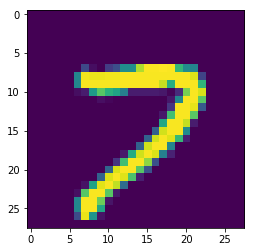

In [33]:
ix = 3
print(y_train[target_indices[ix]])
plt.imshow(X_train[target_indices[ix]].reshape(28, 28))

In [20]:
numbered_labels = [(ix, y) for ix, y in enumerate(y_train)]


ValueError: a must be 1-dimensional

In [32]:
show_graph(tf.get_default_graph())